# WeRateDogs Twitter Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#analysis">Analysis</a></li>
<li><a href="#insights">Insights</a></li>
<li><a href="#links">Links Used</a></li>    
</ul>

<a id='intro'></a>
## Introduction

>In this project I will be wrangling, analyzing analyzing the tweet archive of Twitter user **[@dog_rates](https://twitter.com/dog_rates)**. 

>I will use 3 data sets to complete the task: Enhanced Twitter Archive, Additional Twitter data (as much as I'd love to learn via the Twitter API my application hasn't been approved yet so I have to download the data from Udacity website) and the Image Prediction file.

>*describe why the additional data can be accessed in the submission note. 

> Files details:
 - Enhanced Twitter Archive contains tweets with ratings only but the data should be cleaned.
 - Additional Twitter data contains data on retweet and favorite counts for all tweets includig the ones without ratings.
 - Prediction file contains data on dog breeds obtained via neural network algorithm.

> Project details:
- You only want **original ratings (no retweets)** that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to **assess and clean at least 8 quality issues and at least 2 tidiness issues** in this dataset.
- Cleaning includes **merging individual pieces of data** according to the rules of tidy data.
- The fact that the rating **numerators are greater than the denominators does not need to be cleaned**. This unique rating system is a big part of the popularity of WeRateDogs.
- You **do not need to gather the tweets beyond August 1st, 2017**. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

<a id='wrangling'></a>
## Data Wrangling

### Gather

In [74]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [75]:
t_arc = pd.read_csv('twitter_archive_enhanced.csv')

>**Note: I couldn't connect to Twitter API since my application hasn't been approved yet so I have to use the Udacity provided file for this project.**

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = t_arc.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
0.14542152500001748
{892420643555336193: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],)}


In [76]:
add_data = pd.read_json('tweet_json.txt',lines=True,encoding='utf-8')

In [77]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
get_file = url.split('/')[-1].replace('-','_')
with open(get_file,mode = 'wb') as file:
    file.write(response.content)
img_pred = pd.read_csv(get_file,sep='\t')

In [78]:
# creating a csv file so that it can be opened in Google Sheets 
add_data.to_csv('add_data.csv')

### Assess

> Since the amount of data each dataframe contains is less than Google Sheets limit (5000000 cells, 18278 Columns,100 MB per file) Google Sheets will be used to assess the data visually.
The data will also be assesed programmatically with `.head()`,`.info()`,`.value_counts()`,`.duplicated()` and other methods.

`t_arc`

In [79]:
t_arc.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [80]:
# checking if there are abnormally short names
s = t_arc.name.str.len().sort_values().index
df1 = t_arc.reindex(s)
df1 = df1.reset_index(drop=True)
df1[df1.name.str.len() >1]['name']

56                  Al
57                  JD
58                  my
59                  Ed
60                  by
61                  an
62                  an
63                  Bo
64                  Bo
65                  Jo
66                  an
67                  Bo
68                  Mo
69                  an
70                  Bo
71                  Bo
72                  an
73                  Bo
74                  an
75                  Bo
76                  an
77                  Bo
78                  Bo
79                 Leo
80                 not
81                 Ace
82                 Sky
83                 Ron
84                 Bob
85                 Tyr
             ...      
2326         Sebastian
2327         Remington
2328         Sebastian
2329         Shnuggles
2330         Genevieve
2331         Kathmandu
2332         Roosevelt
2333         Sprinkles
2334         Naphaniel
2335         Sebastian
2336         Bookstore
2337         Bonaparte
2338       

In [81]:
len(t_arc.timestamp.str.find('+0000'))

2356

In [82]:
t_arc.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [83]:
t_arc.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

`add_data`

In [84]:
add_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [85]:
add_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [86]:
add_data.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

In [87]:
add_data.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

`img_pred`

In [88]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [89]:
img_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
teddy                         18
beagle                        18
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [90]:
# checking if there are any duplicates in the dataframes
for i in [t_arc,add_data.id,img_pred]:
    assert i.duplicated().sum() == 0

#### Quality

###### `t_arc` table
- mistakes in **'name'** column.
- **'timestamp'** column has `+0000` substring along with datetime values.
- some ints in **'rating_numerator'** and **'rating_denominator'** columns are 3-digit ones.
- a record with **‘tweet_id’** = 835246439529840640 has incorrect rating - 960/00.
- **'tweet_id'** is an int not a string.
- **'timestamp'** is a string not a datetime.
- values in **'source'** column are surrounded by html tags.
- some dog tweets have 2 dog stages.
- columns indicating dog stages are objects not categories.
- **'source'** column is an object not a category.
- hyperlinks are present in 'text' column in `t_arc` table.

###### `add_data` table
- **'id'** is an int not a string.
- **'favorite_count'** and **'retweet counts'** are floats not ints.

###### `img_pred` table
- **'tweet_id'** is an int not a string.
- some values in **'p1_conf'** column are FALSE and don't represent the breed of a dog.
- inconsistent dog breed names (some are in lower case and some capitalized).
- dog breed names are separated by underscore.
- **'p1'** column should be renamed as **'breed'**.
- columns indicating dog breeds is an object not a category.

#### Tidiness

- values in **'doggo'**, **'floofer'**, **'pupper'**, **'puppo'** columns belong to the same variable.
- in all 3 dataframes there are columns that aren’t necessary for analysis.
- all 3 data frames are the parts of the same observational unit (tweets with dogs).
- **'rating_numerator'** and **'rating_denominator'** values in `t_arc` table should in one column since they represent the same variable.

### Clean

**Creating copies of dataframes.**

In [91]:
c_arc = t_arc.copy()
c_add = add_data.copy()
c_img = img_pred.copy()

> #### Step 1

##### Define

Drop columns that won't be meaningful for analysis leaving only: in `c_arc`: **'tweet_id'**', **'timestamp'**,  **'source'**,  **'text'**,  **'rating_numerator'**,  **'rating_denominator'**,  **'name'**, **'doggo'**,  **'floofer'**,  **'pupper'**,  **'puppo'**; in `c_add`:  **'id'**,  **'favorite_count'**, **'retweet_count'**; in `c_img`:  **'tweet_id'**,  **'p1'**, **'p1_dog'**.

##### Code

In [92]:
c_arc.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [93]:
c_arc = c_arc[['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo']]
# I decided to drop 'name' columns here since there are a lot of mistakes in this column and this variable is not usefull in the analysis

In [94]:
c_add = c_add[[ 'id', 'favorite_count', 'retweet_count']]

In [95]:
c_img = c_img[['tweet_id', 'p1','p1_dog']]

##### Test

In [96]:
c_arc.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,None,None,None,None


In [97]:
c_add.head(1)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853


In [98]:
c_img.head(1)

,tweet_id,p1,p1_dog
0,666020888022790149,Welsh_springer_spaniel,True


>#### Step 2

##### Define

Create a new column with variables taken from **'doggo'**, **'floofer'**, **'pupper'**, **'puppo'** columns of `c_arc` table and eliminate these 4 columns.

##### Code

In [99]:
c_arc = pd.melt(c_arc, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator'], var_name='to_drop', value_name='dog_stage')

In [100]:
c_arc.drop('to_drop',axis=1,inplace=True)
c_arc.drop_duplicates(inplace=True)

In [101]:
for i in c_arc.tweet_id:
    if c_arc[c_arc.tweet_id == i].shape[0] == 2:
        c_arc.drop(c_arc.query('tweet_id == @i and dog_stage == "None"').index,inplace=True)
    elif c_arc[c_arc.tweet_id == i].shape[0] == 3:
        c_arc.drop(c_arc.query('tweet_id == @i and dog_stage == "None"').index,inplace=True)
        c_arc.loc[c_arc[c_arc.tweet_id == i].index.values.astype(int)[0],'dog_stage'] = 'multiple'

In [102]:
for i in np.array(c_arc[c_arc.dog_stage == 'multiple'][['tweet_id']]):
    c_arc.drop(c_arc.query('tweet_id == @i and dog_stage != "multiple"').index,inplace=True)

##### Test

In [103]:
c_arc.shape[0]

2356

In [104]:
c_arc.dog_stage.value_counts()

None        1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: dog_stage, dtype: int64

>#### Step 3

##### Define

Remove '+0000' substrings from ever string of **'timestamp'** column of `c_arc` table.

##### Code

In [105]:
c_arc.timestamp = c_arc.timestamp.str.strip('+0000')

##### Test

In [106]:
c_arc.timestamp.sample(5)

1432    2016-02-10 18:11:03 
217     2017-04-07 16:10:12 
931     2016-07-16 01:08:03 
1780    2015-12-18 04:00:46 
389     2017-01-31 17:06:32 
Name: timestamp, dtype: object

> #### Step 4

##### Define

Correct **'rating_denominator'** column with **'tweet_id' ==  835246439529840640** to 100 of `c_arc` table.

##### Code

In [107]:
c_arc.loc[c_arc[c_arc.tweet_id == 835246439529840640].index.values.astype(int)[0],'rating_denominator'] = 100

##### Test

In [108]:
c_arc.loc[c_arc.tweet_id == 835246439529840640]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_stage
313,835246439529840640,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,960,100,None


> #### Step 5

##### Define

Remove hyperlinks part from strings in **'text'** column of `c_arc` table.

##### Code

In [109]:
c_arc.text = c_arc.text.str.replace('https:\/\/.*','').str.strip()

##### Test

In [110]:
list(c_arc.text.sample(1))

["This is Kenneth. He's stuck in a bubble. 10/10 hang in there Kenneth"]

> #### Step 6

##### Define

Remove html tags from the **'source'** column of `c_arc` table.

##### Code

In [111]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [112]:
c_arc.source = c_arc.source.apply(remove_html_tags)

##### Test

In [113]:
c_arc.source.sample(5)

5816    Twitter for iPhone
2191    Twitter for iPhone
2148    Twitter for iPhone
83      Twitter for iPhone
1972    Twitter for iPhone
Name: source, dtype: object

> #### Step 7

##### Define

Rename column **'p1'** in `c_img` table, capitalize the breed names and remove underscores between the words indicating the breed of a dog.

##### Code

In [114]:
%%capture
c_img.rename(columns = {'p1':'breed'},inplace = True)

In [115]:
%%capture
c_img.breed = c_img.breed.str.capitalize().str.replace('_',' ')

##### Test

In [116]:
c_img.sample(1)

,tweet_id,breed,p1_dog
839,694356675654983680,Hamster,False


> #### Step 8

##### Define

Remove the rows from `c_img` table that has **'p1_dog'** = `False` since we need only need the information about the breed.

##### Code

In [117]:
c_img = c_img[c_img.p1_dog == True]

##### Test

In [118]:
c_img.shape[0]

1532

> #### Step 9

##### Define

Merge `c_arc`, `c_add`, `c_img` tables into one table.

##### Code

In [119]:
merge1 = c_arc.merge(c_add,left_on = 'tweet_id',right_on = 'id', how = 'left')
merge1.drop('id',axis=1,inplace=True)
ind_list = list(merge1[merge1.retweet_count.isnull()].index)
merge1.drop(ind_list,axis = 0,inplace = True)
dtweets = merge1.merge(c_img, left_on = 'tweet_id', right_on = 'tweet_id',how = 'left')
dtweets.drop(columns = 'p1_dog',inplace = True)

##### Test

In [120]:
dtweets.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_stage,favorite_count,retweet_count,breed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,None,39467.0,8853.0,NaN


> #### Step 10

##### Define

Change the datatypes of columns in `dtweets` table:
- **'rating_numerator'**,**'rating_denominator'**,**'favorite_count'**,**'retweet_count'** to `int`
- **'source'**,**'dog_stage'**,**'breed'** to `category`
- **'tweet_id'** to `str`
- **'timestamp'** to `timestamp`

##### Code

In [121]:
dtweets[['favorite_count','retweet_count']] = dtweets[['favorite_count','retweet_count']].astype(int)
dtweets[['source','dog_stage','breed']] = dtweets[['source','dog_stage','breed']].astype('category')
dtweets.tweet_id = dtweets.tweet_id.astype(str)
dtweets.timestamp = pd.to_datetime(dtweets.timestamp)

##### Test

In [122]:
dtweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 10 columns):
tweet_id              2354 non-null object
timestamp             2354 non-null datetime64[ns]
source                2354 non-null category
text                  2354 non-null object
rating_numerator      2354 non-null int64
rating_denominator    2354 non-null int64
dog_stage             2354 non-null category
favorite_count        2354 non-null int64
retweet_count         2354 non-null int64
breed                 1531 non-null category
dtypes: category(3), datetime64[ns](1), int64(4), object(2)
memory usage: 160.3+ KB


> #### Step 11

##### Define

Create a new column from division of **'rating_numerator'** by **'rating_denominator'** columus of `dtweets` table and drop the old rating variables.

##### Code

In [123]:
dtweets['rating_calc'] = dtweets.rating_numerator/dtweets.rating_denominator
dtweets.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

##### Test

In [124]:
dtweets.head(1)

,tweet_id,timestamp,source,text,dog_stage,favorite_count,retweet_count,breed,rating_calc
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,None,39467,8853,NaN,1.3


In [125]:
dtweets.rating_calc.sample(5)

377     1.2
475     1.2
1043    0.9
2133    1.1
24      1.3
Name: rating_calc, dtype: float64

>**Save the cleaned data to a file.**

In [126]:
dtweets.to_csv('twitter_archive_master.csv')

<a id='analysis'></a>
## Analysis

Questions, that I will investigate during the analysis:
 - What are the most common breeds of dogs?
 - What breed has the greatest average of rating, retweet count or favorite count?
 - What is the most common source of tweets?
 - What is the most common dog stage?
 - What dog stage has the greatest rating, retweet count or favorite count?
 - Is there are any dependancy between calculated rating, retweet count or favorite count?

In [127]:
def bar_chart(table,x,limit):
    """creates a simple bar chart counting values for each category"""
    base_color = sns.color_palette()[0]
    order = table[x].value_counts().iloc[:limit].index
    sns.countplot(data = breed_tweet, x = x, color = base_color, order = order);
    plt.xticks(rotation = 90); 

In [128]:
def avg_graph(df,grp1,grp2,limit):
    """creates a bar chart for grouped values"""
    group = df.groupby(grp1)[grp2].mean().nlargest(limit)
    keys = list(group.keys())
    frame = pd.DataFrame({grp1:keys,grp2:group})
    frame.reset_index(drop = True, inplace = True)
    plt.xlabel(grp1); plt.ylabel(grp2)
    plt.xticks(range(limit),frame[grp1],rotation=90)
    plt.bar(range(limit),frame[grp2],align = 'center',alpha = 1);

In [129]:
def prop_graph(x):
    """creates a relative frequency bar chart"""
    base_color = sns.color_palette()[0]
    cat_counts = dtweets[x].value_counts()
    cat_order = cat_counts.index

    n_points = dtweets.shape[0]
    max_count = dtweets[x].value_counts().max()
    max_prop = max_count / n_points

    tick_props = np.arange(0, max_prop,0.2)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    sns.countplot(data = dtweets, x = x, color = base_color, order = cat_order)
    plt.yticks(tick_props * n_points, tick_names)
    plt.ylabel('proportion');

    locs, labels = plt.xticks()
    for loc, label in zip(locs, labels):
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)
        plt.text(loc, count+15, pct_string, ha = 'center', color = 'black')
    
    plt.xticks(rotation = 90);

**Source of tweets**

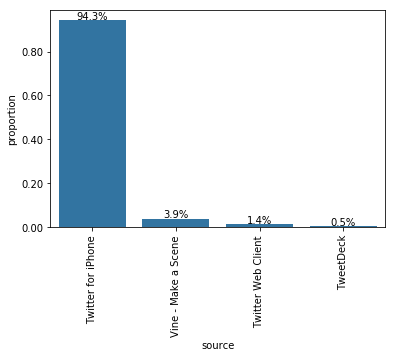

In [130]:
prop_graph('source')

**Breeds of dogs**

In [131]:
breed_tweet = dtweets[dtweets.breed.notna()]

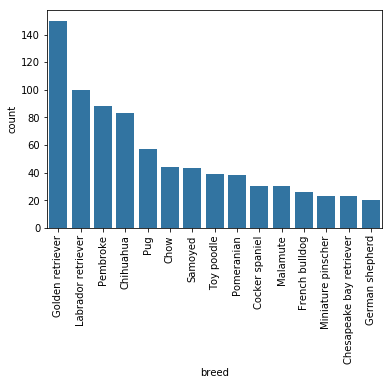

In [132]:
bar_chart(breed_tweet,'breed',15)

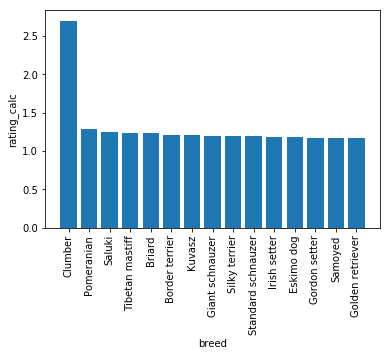

In [133]:
avg_graph(breed_tweet,'breed','rating_calc',15)

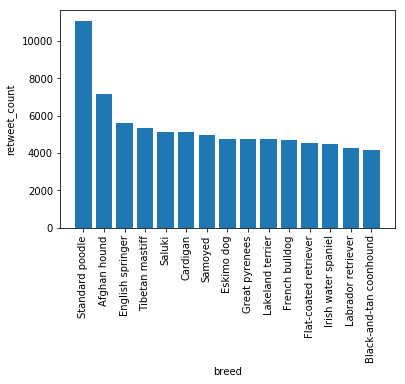

In [134]:
avg_graph(breed_tweet,'breed','retweet_count',15)

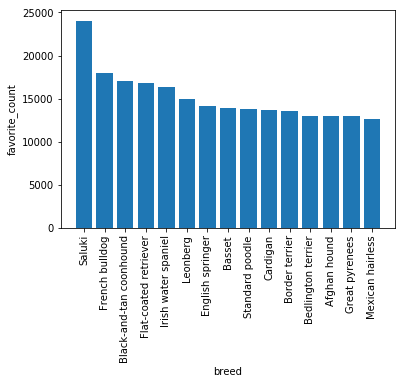

In [135]:
avg_graph(breed_tweet,'breed','favorite_count',15)

**Dog stages**

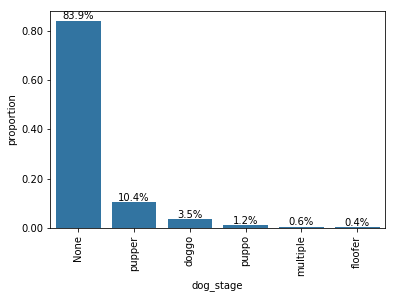

In [136]:
prop_graph('dog_stage')

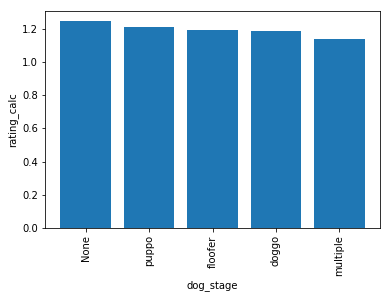

In [137]:
avg_graph(dtweets,'dog_stage','rating_calc',5)

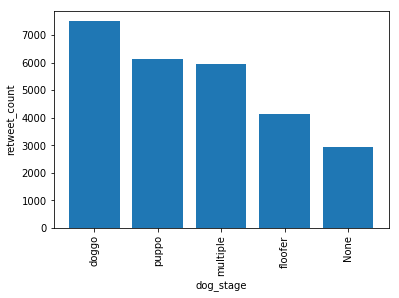

In [138]:
avg_graph(dtweets,'dog_stage','retweet_count',5)

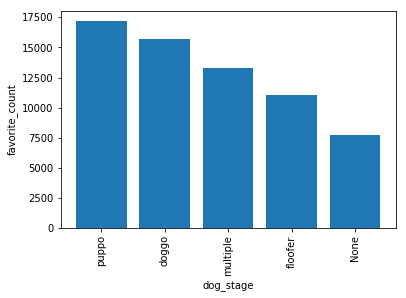

In [139]:
avg_graph(dtweets,'dog_stage','favorite_count',5)

**Correlation**

In [140]:
dtweets_scatter = dtweets[dtweets.rating_calc < 2]
# removing outliers to get more appropriate shape of the distribution

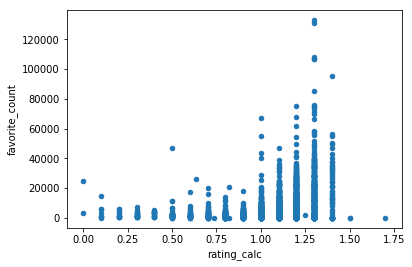

In [141]:
dtweets_scatter.plot(x = 'rating_calc', y='favorite_count', kind='scatter');

In [142]:
dtweets_scatter[['rating_calc','favorite_count']].corr()

,rating_calc,favorite_count
rating_calc,1.000000,0.339264
favorite_count,0.339264,1.000000


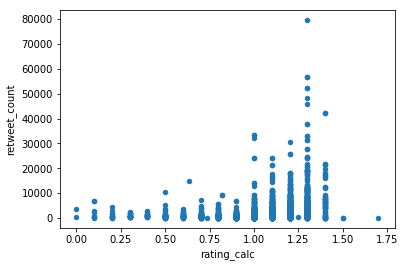

In [143]:
dtweets_scatter.plot(x = 'rating_calc', y='retweet_count', kind='scatter');

In [144]:
dtweets_scatter[['rating_calc','retweet_count']].corr()

,rating_calc,retweet_count
rating_calc,1.000000,0.288445
retweet_count,0.288445,1.000000


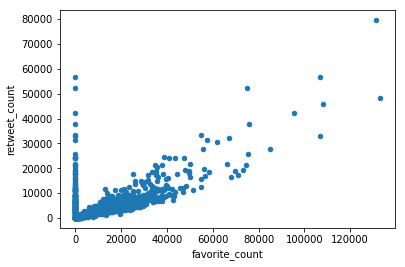

In [145]:
dtweets.plot(x = 'favorite_count', y='retweet_count', kind='scatter');

In [146]:
dtweets_scatter[['favorite_count','retweet_count']].corr()

,favorite_count,retweet_count
favorite_count,1.000000,0.703004
retweet_count,0.703004,1.000000


<a id='insights'></a>
## Insights

- Almost all of the tweets came from the “Twitter for iPhone” and only the tiny amount from tweets came from another services.
- Golden retriever is the most common dog breed, Clumber has the largest rating number, Standard poodle has the largest average number of retweets and Saluki has the largest average number of likes is worth noting that 6 dog breeds in top-15 of the most likeable and retweetable dog tweets are hunting breeds.
- 83.9% of the data doesn’t have dog stages labelling, there is almost no difference in ratings across dog stages, ‘doggo’ has the largest average number of retweets and ‘puppo’ has the largest average number of likes, the dogs tweets with ‘multiple’ stage hold the 3rd highest average number of both likes and retweets and the dogs without stage hold the least average number of both likes and retweets.
- A weak correlation between likes and ratings and retweets, a stronger correlation between likes and retweets even though it shows heteroskedasticity, some dog tweets have a relatively few likes but a lot of retweets.  

<a id='links'></a>
## Links Used

[Load JSON files](https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pandas)

[Sort DataFrame by string length](https://stackoverflow.com/questions/42516616/sort-dataframe-by-string-length)

[Strip html tags from a string](https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44)

[Limit the number of groups in countplot](https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot)

[Udacity Data Analyst Nanodegree - Data Visualization - Univariate Exploration of Data](https://classroom.udacity.com/nanodegrees/nd002/parts/9f7e8991-8bfb-4103-8307-3b6f93f0ecc7/modules/1dc09d28-5703-493c-aab5-a418b8bfa3e1/lessons/b86503df-e416-4f0e-9e2d-a7a3c08d0bc3/concepts/83335e78-7d71-423b-84a9-f47cdf64c0f9)

[Gettign n largest values in groups](https://github.com/pandas-dev/pandas/issues/29129)

[Getting names of grouped values](https://stackoverflow.com/questions/28844535/python-pandas-groupby-get-list-of-groups)